In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df= pd.read_csv('hour.csv')

In [48]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
# correlation 
cor = df.corr()
cor['cnt'].sort_values(ascending=False)

cnt           1.000000
registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
instant       0.278379
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64

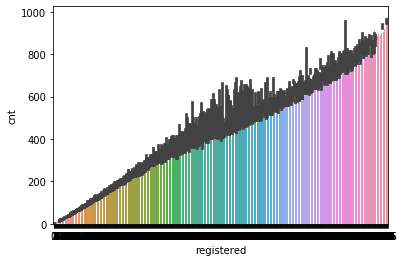

In [7]:
sns.barplot('registered','cnt',data=df)

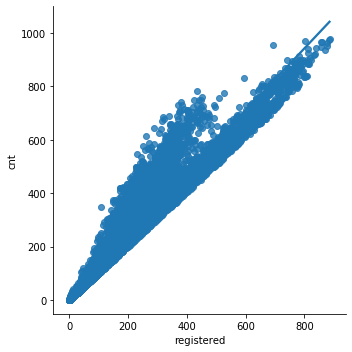

In [10]:
sns.lmplot('registered','cnt',data=df)

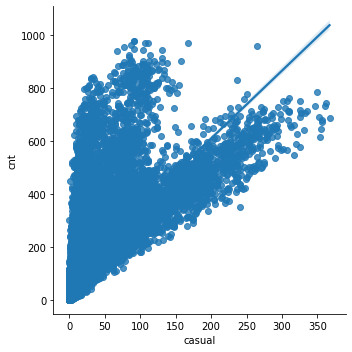

In [11]:
sns.lmplot('casual','cnt',data=df)

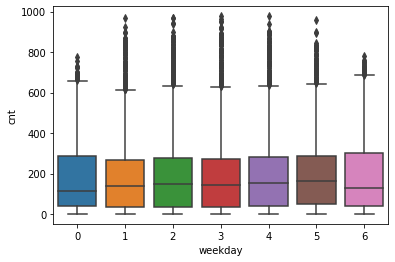

In [19]:
sns.boxplot(x='weekday',y='cnt',data=df)

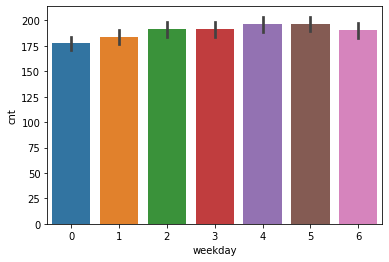

In [20]:
sns.barplot(x='weekday',y='cnt',data=df)

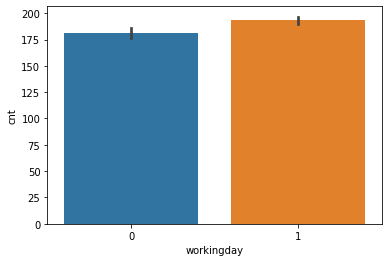

In [21]:
sns.barplot(x='workingday',y='cnt',data=df)

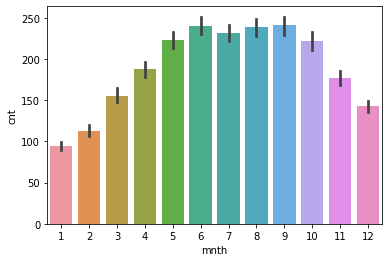

In [22]:
sns.barplot(x='mnth',y='cnt',data=df)

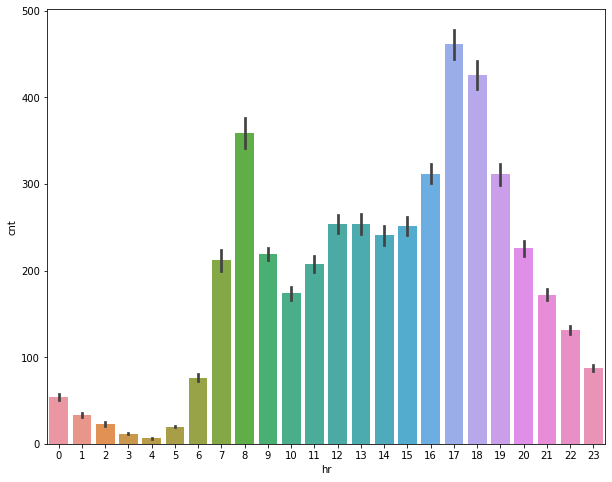

In [27]:
plt.figure(figsize=(10,8))
sns.barplot('hr','cnt',data=df)

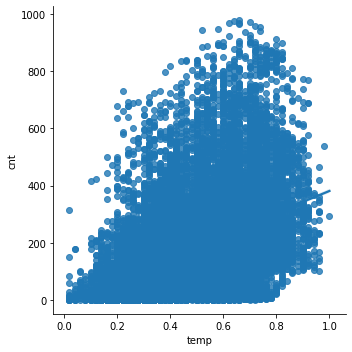

In [25]:
 sns.lmplot('temp','cnt',data=df)

In [35]:
df.drop(['dteday','instant'],axis=1,inplace=True)


In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler_feature = scaler.fit_transform(df.drop('cnt',axis=1))

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaler_feature,df['cnt'], test_size=0.33, random_state=42)

# Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

lr = LinearRegression()

lr.fit(X_train,y_train)
lr_predict = lr.predict(X_test)

print(f'MAE -> {mean_absolute_error(y_test,lr_predict)}')
print(f'MSE -> {mean_squared_error(y_test,lr_predict)}')
print(f'RMSE -> {np.sqrt(mean_squared_error(y_test,lr_predict))}')
print(f'Accuracy -> {r2_score(y_test,lr_predict)}')


MAE -> 1.6045927952222596e-13
MSE -> 4.013094077219863e-26
RMSE -> 2.003270844698705e-13
Accuracy -> 1.0


# Hence By using Linear Regression we get perfect Accuracy !!!

# Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_predict = rf.predict(X_test)



print(f'MAE -> {mean_absolute_error(y_test,rf_predict)}')
print(f'MSE -> {mean_squared_error(y_test,rf_predict)}')
print(f'RMSE -> {np.sqrt(mean_squared_error(y_test,rf_predict))}')
print(f'Accuracy -> {r2_score(y_test,rf_predict)}')


MAE -> 0.9698866806136678
MSE -> 6.537287883542536
RMSE -> 2.5568120547945123
Accuracy -> 0.9997950786619185


# Hence By using Random Forest we get very good Accuracy

# SVM

In [45]:
from sklearn.svm import SVR

svm = SVR(kernel='linear')

svm.fit(X_train,y_train)
svm_predict = svm.predict(X_test)


print(f'MAE -> {mean_absolute_error(y_test,svm_predict)}')
print(f'MSE -> {mean_squared_error(y_test,svm_predict)}')
print(f'RMSE -> {np.sqrt(mean_squared_error(y_test,svm_predict))}')
print(f'Accuracy -> {r2_score(y_test,svm_predict)}')


MAE -> 0.04598314116852182
MSE -> 0.0027048659223927896
RMSE -> 0.052008325510371795
Accuracy -> 0.9999999152118196


# Hence By using Random Forest we get very good Accuracy

# Therefore Conclusion is :-

In [46]:
Conclusion = pd.DataFrame({'Model': ['Linear Regression','Random Forest','SVM'],
                           'Accuracy': [r2_score(y_test,lr_predict),r2_score(y_test,rf_predict),r2_score(y_test,svm_predict)]
                           })
Conclusion

,Model,Accuracy
0,Linear Regression,1.000000
1,Random Forest,0.999795
2,SVM,1.000000
